In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py 

In [2]:
# with h5py.File('results_TDPaperUpgradedLowV2.hdf5', 'r') as f:
    
with h5py.File('results_TDPaperWithLowPressureOptimized.hdf5', 'r') as f:
    
    exp_data = f['exp_data'][:]
    gammas_data = f['gammas_data'][:]
    gammas_names = f['gammas_names'][:].astype(str)
    exp_names = f['exp_names'][:].astype(str)
    recProbExp = f['recProbExp'][:]

In [3]:
print(exp_names)

['Tnw' 'Tw' 'O_den' 'pressure' 'current' 'FluxIon' 'EavgMB']


In [4]:
Tnw_vec = exp_data[:, 0]
Tw_vec = exp_data[:, 1]
pressure_vec = exp_data[:, 3]
current_vec = exp_data[:, 4]
gammas_total_vec = np.sum(gammas_data, axis=1)
gammas_exp_vec = recProbExp


pair:  [262.53133733 265.49039366 268.28248792 276.84558189 281.93841258
 290.0677226  269.53534743 273.34686625 276.98517131 280.45629675
 288.44229854 295.51542442 307.3001819  324.063654   340.03504125]
pair:  [286.80208631 289.44956301 291.95269446 294.31804697 299.67173672
 304.30794586 311.838316   322.8036195  293.41748159 296.87130715
 300.20619241 303.42525776 310.98668654 317.89249933 329.93230117
 348.2897795  364.53001706]
pair:  [305.36649745 308.13522322 310.73354675 313.16971083 318.60476684
 323.20663754 330.42599782 340.533418   311.72120783 315.15240639
 318.48539091 321.72192152 329.40281316 336.51937104 349.1694944
 368.907834   385.42111662]
pair:  [327.53090967 330.42088502 333.11440112 335.62137727 341.13780073
 345.70533414 352.61368704 361.8632305  333.624809   337.03343153
 340.36455854 343.61859037 351.41900578 358.74633383 372.00674932
 393.1257681  409.91221146]


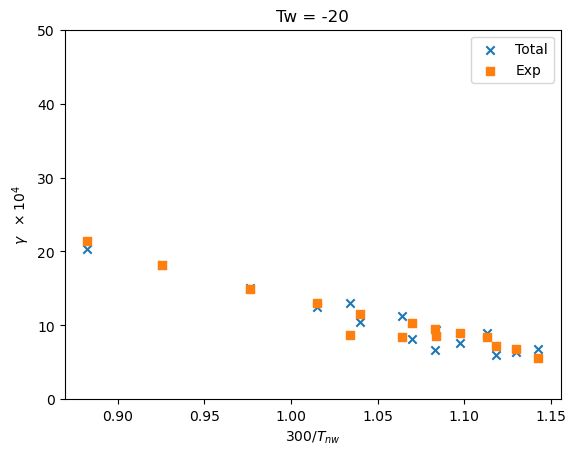

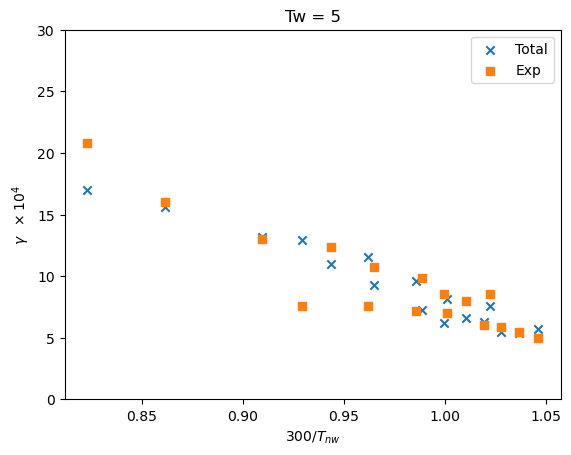

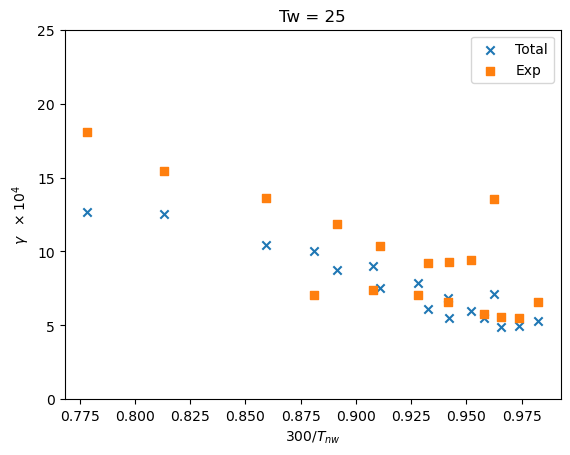

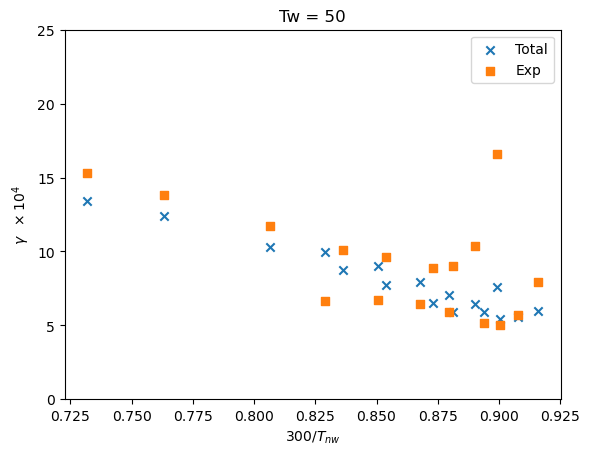

In [5]:

#### Plots as a function of 300/Tnw

Tw_unique_values = np.unique(Tw_vec)

for value in Tw_unique_values:
    Tw = value
    indices = np.where((Tw_vec == Tw))[0]
    gammas_total = gammas_total_vec[indices]
    gammas_total_comp = gammas_data[indices, :]
    
    
    gammas_exp = gammas_exp_vec[indices]
    Tnw = Tnw_vec[indices]
    print("pair: ", Tnw)
    x_vec = 300*np.reciprocal(Tnw)
    
    pressure = pressure_vec[indices]
    # plt.figure()
    fig, ax = plt.subplots()
    ax.scatter(x_vec, gammas_total*1e4, label='Total', marker='x')
    ax.scatter(x_vec, gammas_exp*1e4, label='Exp', marker='s')
    
    
    if Tw-273.15 == -20:
        ax.set_yticks(range(0, 51, 10))
        filename = 'Tw-20Upg.png'
    if Tw-273.15 == 5:
        ax.set_yticks(range(0, 31, 5))
        filename = 'Tw5Upg.png'
    if Tw-273.15 == 25:
        ax.set_yticks(range(0, 26, 5))
        filename = 'Tw25Upg.png'
    if Tw-273.15 == 50:
        ax.set_yticks(range(0, 26, 5))
        filename = 'Tw50Upg.png'
    
    # for i in range(gammas_data.shape[1]):
    #     plt.scatter(x_vec, gammas_total_comp[:, i], label=gammas_names[i], marker='.')
    
    # plt.grid()
    plt.xlabel(r"$300/T_{nw}$")
    plt.ylabel(r"$\gamma ~~ \times 10^4$")
    plt.title('Tw = %d' % (Tw-273.15))
    # plt.yscale('log')
    plt.legend()
    # plt.savefig("figures/" + filename)
    # plt.show()

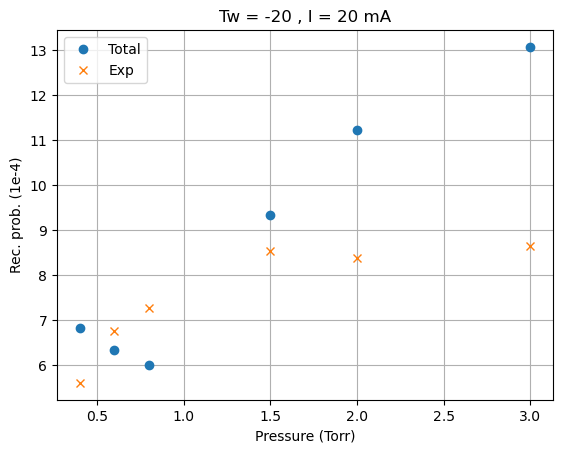

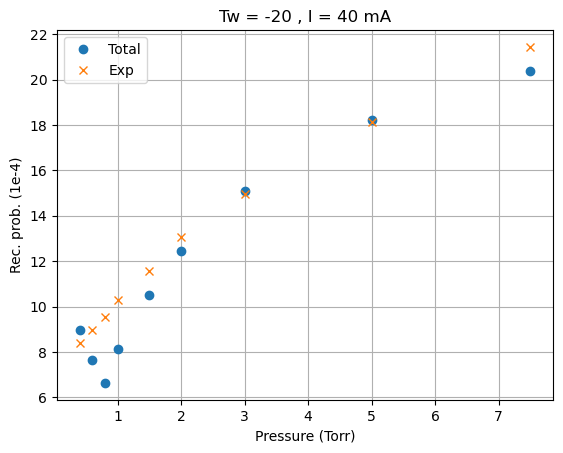

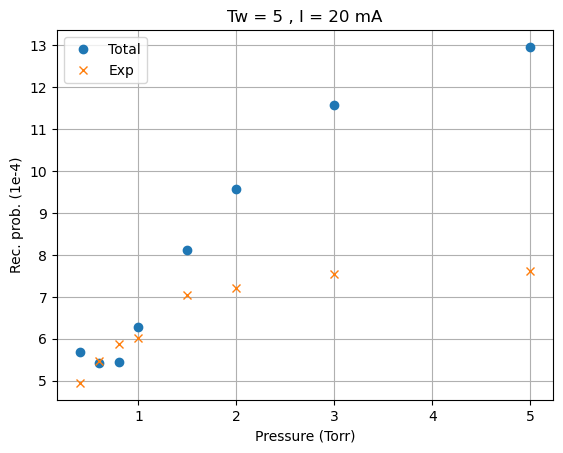

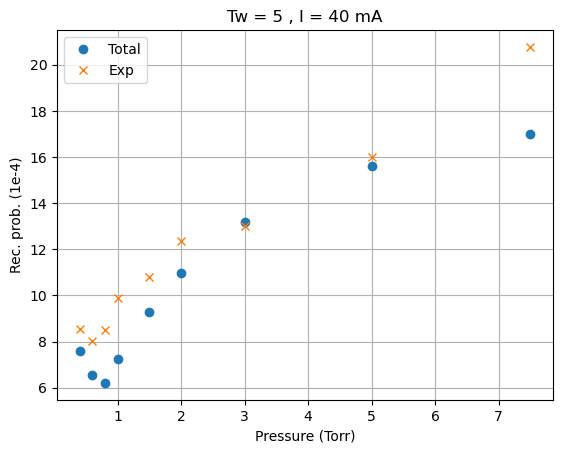

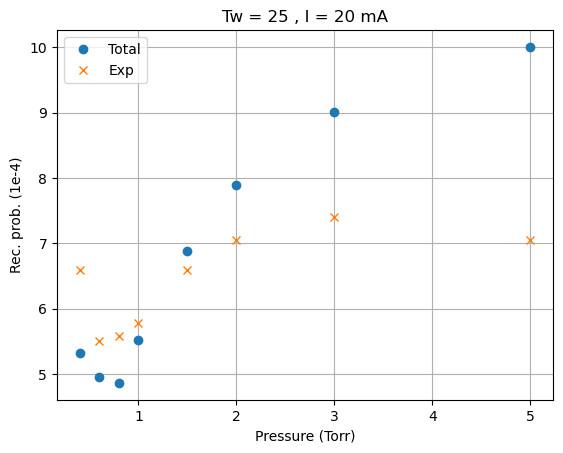

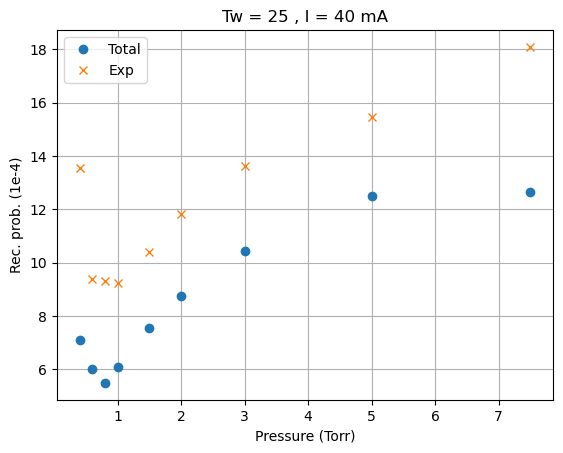

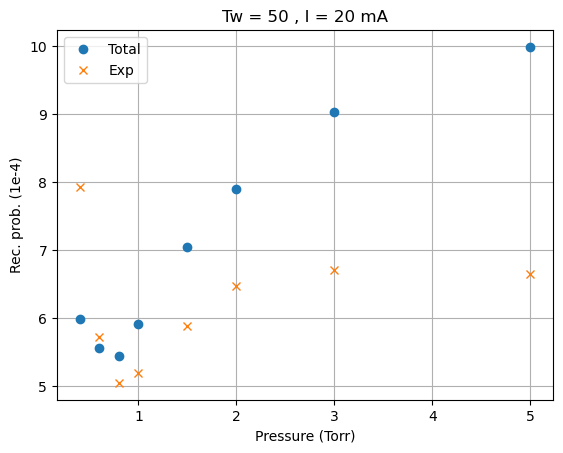

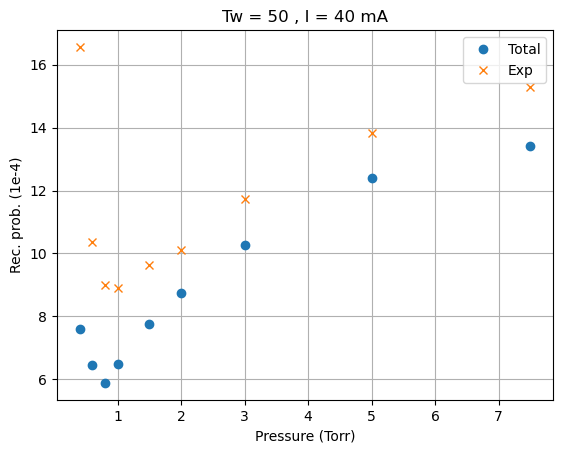

In [6]:

#### Plots as a function of pressure 

Tw_unique_values = np.unique(Tw_vec)
current_unique_values = np.unique(current_vec)

Tw_current_combinations = np.array(np.meshgrid(Tw_unique_values, current_unique_values)).T.reshape(-1, 2)

for pair in Tw_current_combinations:
    Tw = pair[0]
    current = pair[1]
    indices = np.where((Tw_vec == Tw) & (current_vec == current))[0]
    gammas_total = gammas_total_vec[indices]
    gammas_exp = gammas_exp_vec[indices]
    pressure = pressure_vec[indices]
    plt.figure()
    plt.plot(pressure, gammas_total*1e4, 'o', label='Total')
    plt.plot(pressure, gammas_exp*1e4, 'x', label='Exp')
    plt.grid()
    plt.xlabel('Pressure (Torr)')
    plt.ylabel('Rec. prob. (1e-4)')
    plt.title('Tw = %d , I = %d mA' % (Tw-273.15, current))
    plt.legend()
    plt.show()
